# Feature Selection

This notebook browsers the ## features retained during murging and transformation and decides which should be kept for the modeling process.

### Import Data

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
import warnings
import yellowbrick as yb
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [5]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [6]:
cursor.execute('Select * from "AHS_Household_Class"')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names )

In [54]:
path = os.path.join(os.getcwd(), 'data', 'working')
df = pd.read_csv(os.path.join(path, 'AHS Household Class.csv'))

Drop unwanted variales from feature selection

In [55]:
cols = ['Unnamed: 0','CONTROL','YEAR','LN_HINCP','LN_FINCP','RATINGHS_BIN']
droplist = [i for i in df.columns if i in cols]
df.drop(droplist, axis=1, inplace=True)

In [56]:
df.head()

,RATINGHS,STORIES,UFINROOMS,BEDROOMS,HHOLDKIDS,KITCHENS,ELECAMT,HHADLTKIDS,FINROOMS,NUMVETS,...,OWNLOT,WINBARS,KITCHSINK,GARAGE,HHSEE,HHERRND,FIRSTHOME,WASHER,DISHWASH,HHSEX
0,10,1.0,0.0,3.0,0.0,1.0,120.0,0.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
1,8,3.0,0.0,3.0,0.0,1.0,450.0,0.0,2.0,0.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
2,10,1.0,0.0,3.0,3.0,1.0,130.0,0.0,1.0,0.0,...,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
3,9,3.0,0.0,4.0,2.0,1.0,120.0,0.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
4,5,2.0,0.0,4.0,0.0,1.0,140.0,0.0,1.0,0.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20108 entries, 0 to 20107
Data columns (total 76 columns):
RATINGHS      20108 non-null int64
STORIES       20108 non-null float64
UFINROOMS     20108 non-null float64
BEDROOMS      20108 non-null float64
HHOLDKIDS     20108 non-null float64
KITCHENS      20108 non-null float64
ELECAMT       20108 non-null float64
HHADLTKIDS    20108 non-null float64
FINROOMS      20108 non-null float64
NUMVETS       20108 non-null float64
HHMOVE        20108 non-null float64
NUMOLDKIDS    20108 non-null float64
TRASHAMT      20108 non-null float64
WATERAMT      20108 non-null float64
FINCP         20108 non-null float64
BATHROOMS     20108 non-null float64
NUMSUBFAM     20108 non-null float64
NUMSECFAM     20108 non-null float64
UNITSIZE      20108 non-null float64
NUMADULTS     20108 non-null float64
HHYNGKIDS     20108 non-null float64
UTILAMT       20108 non-null float64
NUMELDERS     20108 non-null float64
NUMYNGKIDS    20108 non-null float64
NUMPE

In [58]:
df.describe()

,RATINGHS,STORIES,UFINROOMS,BEDROOMS,HHOLDKIDS,KITCHENS,ELECAMT,HHADLTKIDS,FINROOMS,NUMVETS,...,OWNLOT,WINBARS,KITCHSINK,GARAGE,HHSEE,HHERRND,FIRSTHOME,WASHER,DISHWASH,HHSEX
count,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,...,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,20108.000000,20108.0,20108.000000,20108.000000,20108.000000
mean,8.393127,1.796002,0.021832,2.978267,0.345087,1.000497,119.455441,0.250050,1.378606,0.140740,...,1.040581,1.951611,1.002934,1.295653,1.966730,1.953601,1.0,1.055998,1.341755,1.493982
std,1.612839,0.947553,0.183550,0.801398,0.762960,0.037314,60.538925,0.573392,0.615312,0.359851,...,0.197322,0.214592,0.054090,0.456347,0.179346,0.210354,0.0,0.229923,0.474310,0.499976
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
25%,8.000000,1.000000,0.000000,3.000000,0.000000,1.000000,80.000000,0.000000,1.000000,0.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000
50%,8.000000,2.000000,0.000000,3.000000,0.000000,1.000000,110.000000,0.000000,1.000000,0.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000
75%,10.000000,2.000000,0.000000,3.000000,0.000000,1.000000,150.000000,0.000000,2.000000,0.000000,...,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.0,1.000000,2.000000,2.000000
max,10.000000,7.000000,5.000000,5.000000,7.000000,2.000000,450.000000,6.000000,5.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,2.000000


In [91]:
# Change the data type to int32
df.drop(['HINCP_BIN','FINCP_BIN'], axis=1).astype('int32')

ValueError: invalid literal for int() with base 10: 'Extreme Satisfied'

## Feature Analysis


In [61]:
LABEL_MAP = {
    1: "Un-Satisfied",
    2: "Un-Satisfied",
    3: "Un-Satisfied",
    4: "Un-Satisfied",
    5: "Un-Satisfied",
    6: "Un-Satisfied",
    7: "Satisfied",
    8: "Satisfied",
    9: "Highly Satisfied",
    10: "Extreme Satisfied"
}

# Convert class labels into text
df['RATINGHS'] = df['RATINGHS'].map(LABEL_MAP)


In [62]:
#df_sub['RATINGHS'] = df_sub['RATINGHS'].astype(str)
df['RATINGHS']

0        Extreme Satisfied
1                Satisfied
2        Extreme Satisfied
3         Highly Satisfied
4             Un-Satisfied
5                Satisfied
6             Un-Satisfied
7             Un-Satisfied
8                Satisfied
9                Satisfied
10               Satisfied
11       Extreme Satisfied
12               Satisfied
13               Satisfied
14        Highly Satisfied
15               Satisfied
16               Satisfied
17               Satisfied
18       Extreme Satisfied
19        Highly Satisfied
20            Un-Satisfied
21               Satisfied
22        Highly Satisfied
23               Satisfied
24       Extreme Satisfied
25       Extreme Satisfied
26            Un-Satisfied
27        Highly Satisfied
28        Highly Satisfied
29               Satisfied
30        Highly Satisfied
31            Un-Satisfied
32       Extreme Satisfied
33       Extreme Satisfied
34        Highly Satisfied
35       Extreme Satisfied
36       Extreme Satisfied
3

In [63]:
# Extract our X and y data
X = df.drop('RATINGHS', axis=1).values
y = df['RATINGHS'].values

### Encode our target variable

In [77]:
from sklearn.preprocessing import LabelEncoder
# Encode our target variable

encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

y

array([0, 2, 0, ..., 0, 2, 1])

# Correlation Threshold

In [65]:
pd.set_option('max_rows', 500)
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [66]:
df.drop(df[to_drop], axis=1, inplace=True)

In [67]:
pd.set_option('max_rows', 5000)
df.corr().abs().where(np.triu(np.ones(df.corr().abs().shape), k=1).astype(np.bool)).unstack().sort_values(ascending=False)

HHHEAR      NUMHEAR       0.794431
HHSEE       NUMSEE        0.793646
TOTROOMS    BEDROOMS      0.774022
NUMPEOPLE   NUMADULTS     0.745283
HHAGE       HHMOVE        0.740534
HHERRND     NUMERRND      0.739511
HHMAR       HSHLDTYPE     0.739065
HHCARE      NUMCARE       0.722441
HHMEMRY     NUMMEMRY      0.712989
HHAGE       NUMELDERS     0.694078
NUMADULTS   HHADLTKIDS    0.676828
CONDO       BLD           0.675561
NUMPEOPLE   HHOLDKIDS     0.633555
NUMNONREL   PARTNER       0.633067
TOTROOMS    FINROOMS      0.628362
MULTIGEN    NUMPEOPLE     0.620108
HSHLDTYPE   NUMPEOPLE     0.585857
NUMELDERS   HHMOVE        0.580963
DINING      TOTROOMS      0.572783
HSHLDTYPE   NUMADULTS     0.571670
NUMCARE     NUMERRND      0.544696
MULTIGEN    NUMADULTS     0.534127
UTILAMT     ELECAMT       0.530492
HHERRND     HHCARE        0.522949
NUMWALK     NUMERRND      0.517352
UTILAMT     WATERAMT      0.515523
TOTROOMS    UNITSIZE      0.508608
BLD         STORIES       0.485418
NUMMEMRY    NUMERRND

## Feature Importance

In [68]:
y = df['RATINGHS']
X = df.drop(['RATINGHS','HINCP_BIN','FINCP_BIN'], axis=1)

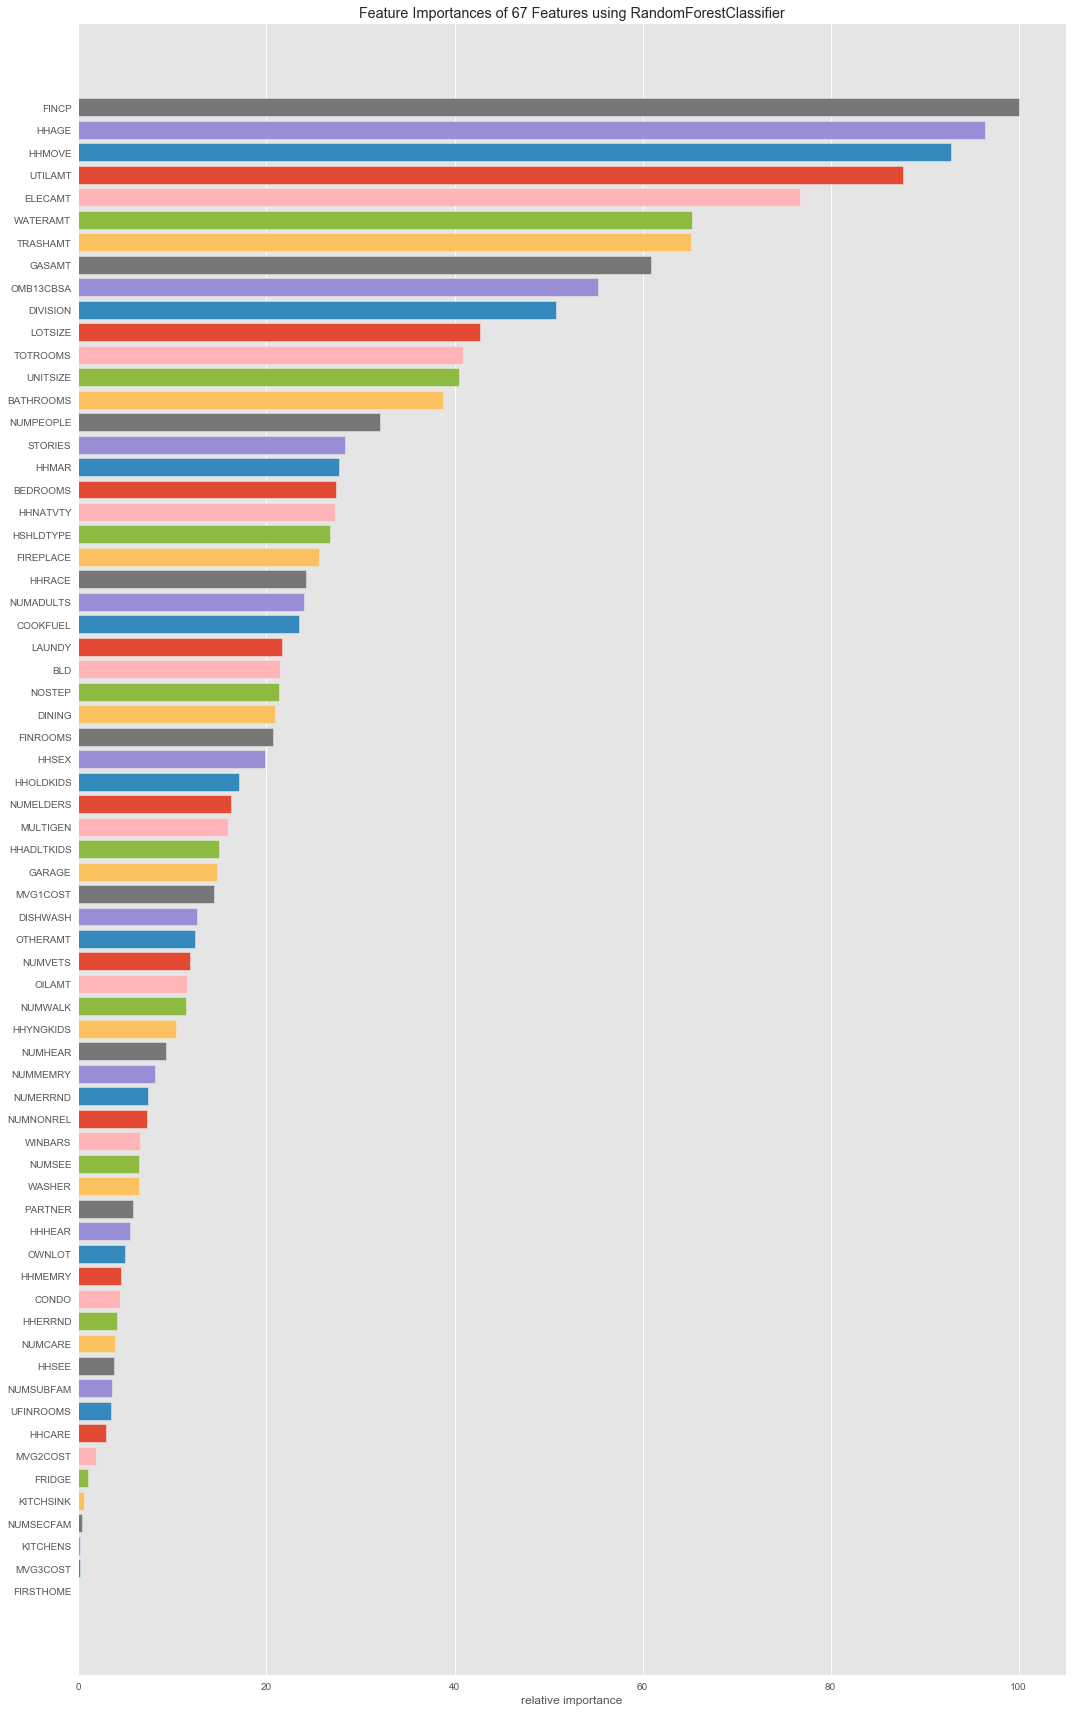

In [69]:
#Using Randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(1080, 1720))

viz.fit(X, y)
viz.show()

In [70]:
# Create a dictionary that will map the feature name with its feature importance
feats = {}

# Loop through Feature
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance # Add the name/value pair

# View our dictionary, but sorted in order of importance
sorted(feats.items(), key=lambda x: x[1], reverse=True)

[('FINCP', 0.0635718115490672),
 ('HHAGE', 0.06126887945942704),
 ('HHMOVE', 0.059018600353518476),
 ('UTILAMT', 0.055763716608345934),
 ('ELECAMT', 0.048810079858085505),
 ('WATERAMT', 0.04146535641624019),
 ('TRASHAMT', 0.041405744663395014),
 ('GASAMT', 0.038734707745178405),
 ('OMB13CBSA', 0.03515678654580877),
 ('DIVISION', 0.032313623116699546),
 ('LOTSIZE', 0.0271223394990926),
 ('TOTROOMS', 0.02599653805682912),
 ('UNITSIZE', 0.025747993369680932),
 ('BATHROOMS', 0.024652835254488564),
 ('NUMPEOPLE', 0.020409384355204157),
 ('STORIES', 0.01800095393922609),
 ('HHMAR', 0.017628542876737593),
 ('BEDROOMS', 0.017436553712010246),
 ('HHNATVTY', 0.017380480680410277),
 ('HSHLDTYPE', 0.017028430599390364),
 ('FIREPLACE', 0.01627727317003052),
 ('HHRACE', 0.015355538994116182),
 ('NUMADULTS', 0.015270475223834713),
 ('COOKFUEL', 0.014917825146417164),
 ('LAUNDY', 0.013742109821921882),
 ('BLD', 0.013641158197191576),
 ('NOSTEP', 0.013558598707312923),
 ('DINING', 0.013274209497011004)

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Michael\Anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


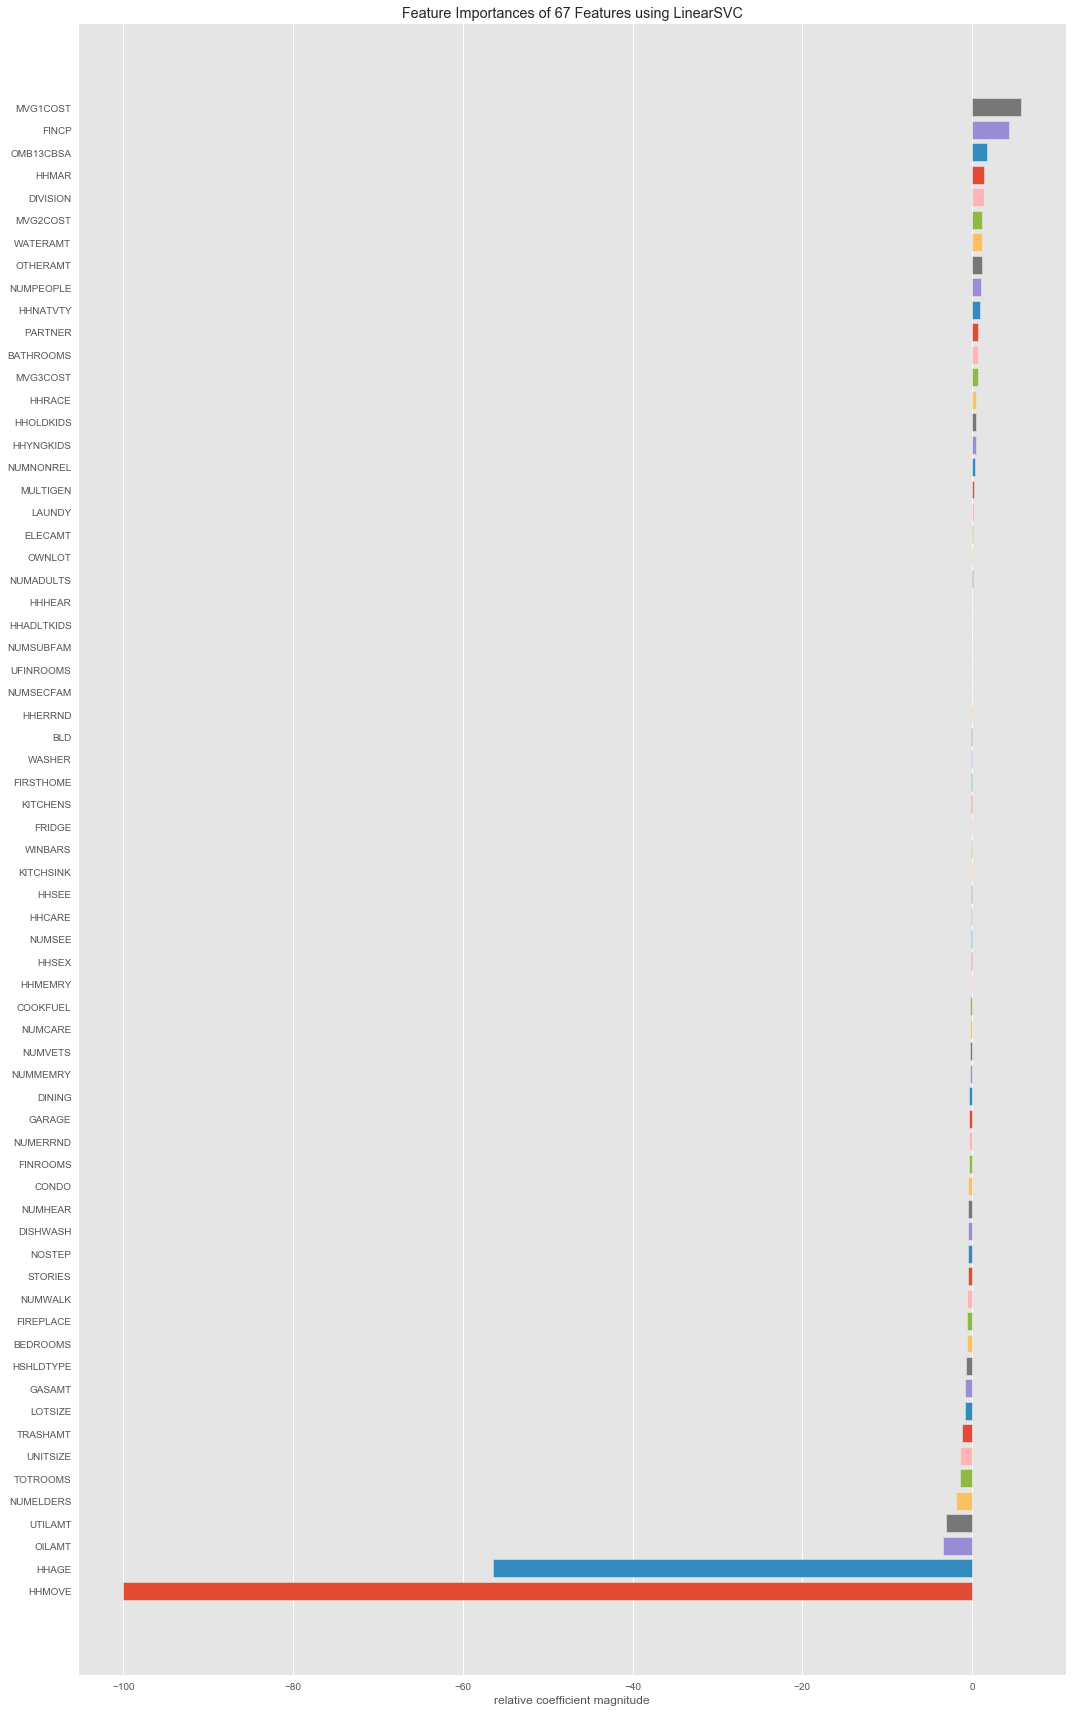

In [71]:
# Using LinearSVC model
from sklearn import svm
from yellowbrick.features import FeatureImportances

model = svm.LinearSVC()
viz = FeatureImportances(model, size=(1080, 1720))

viz.fit(X, y)
viz.show()

C:\Users\Michael\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Michael\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


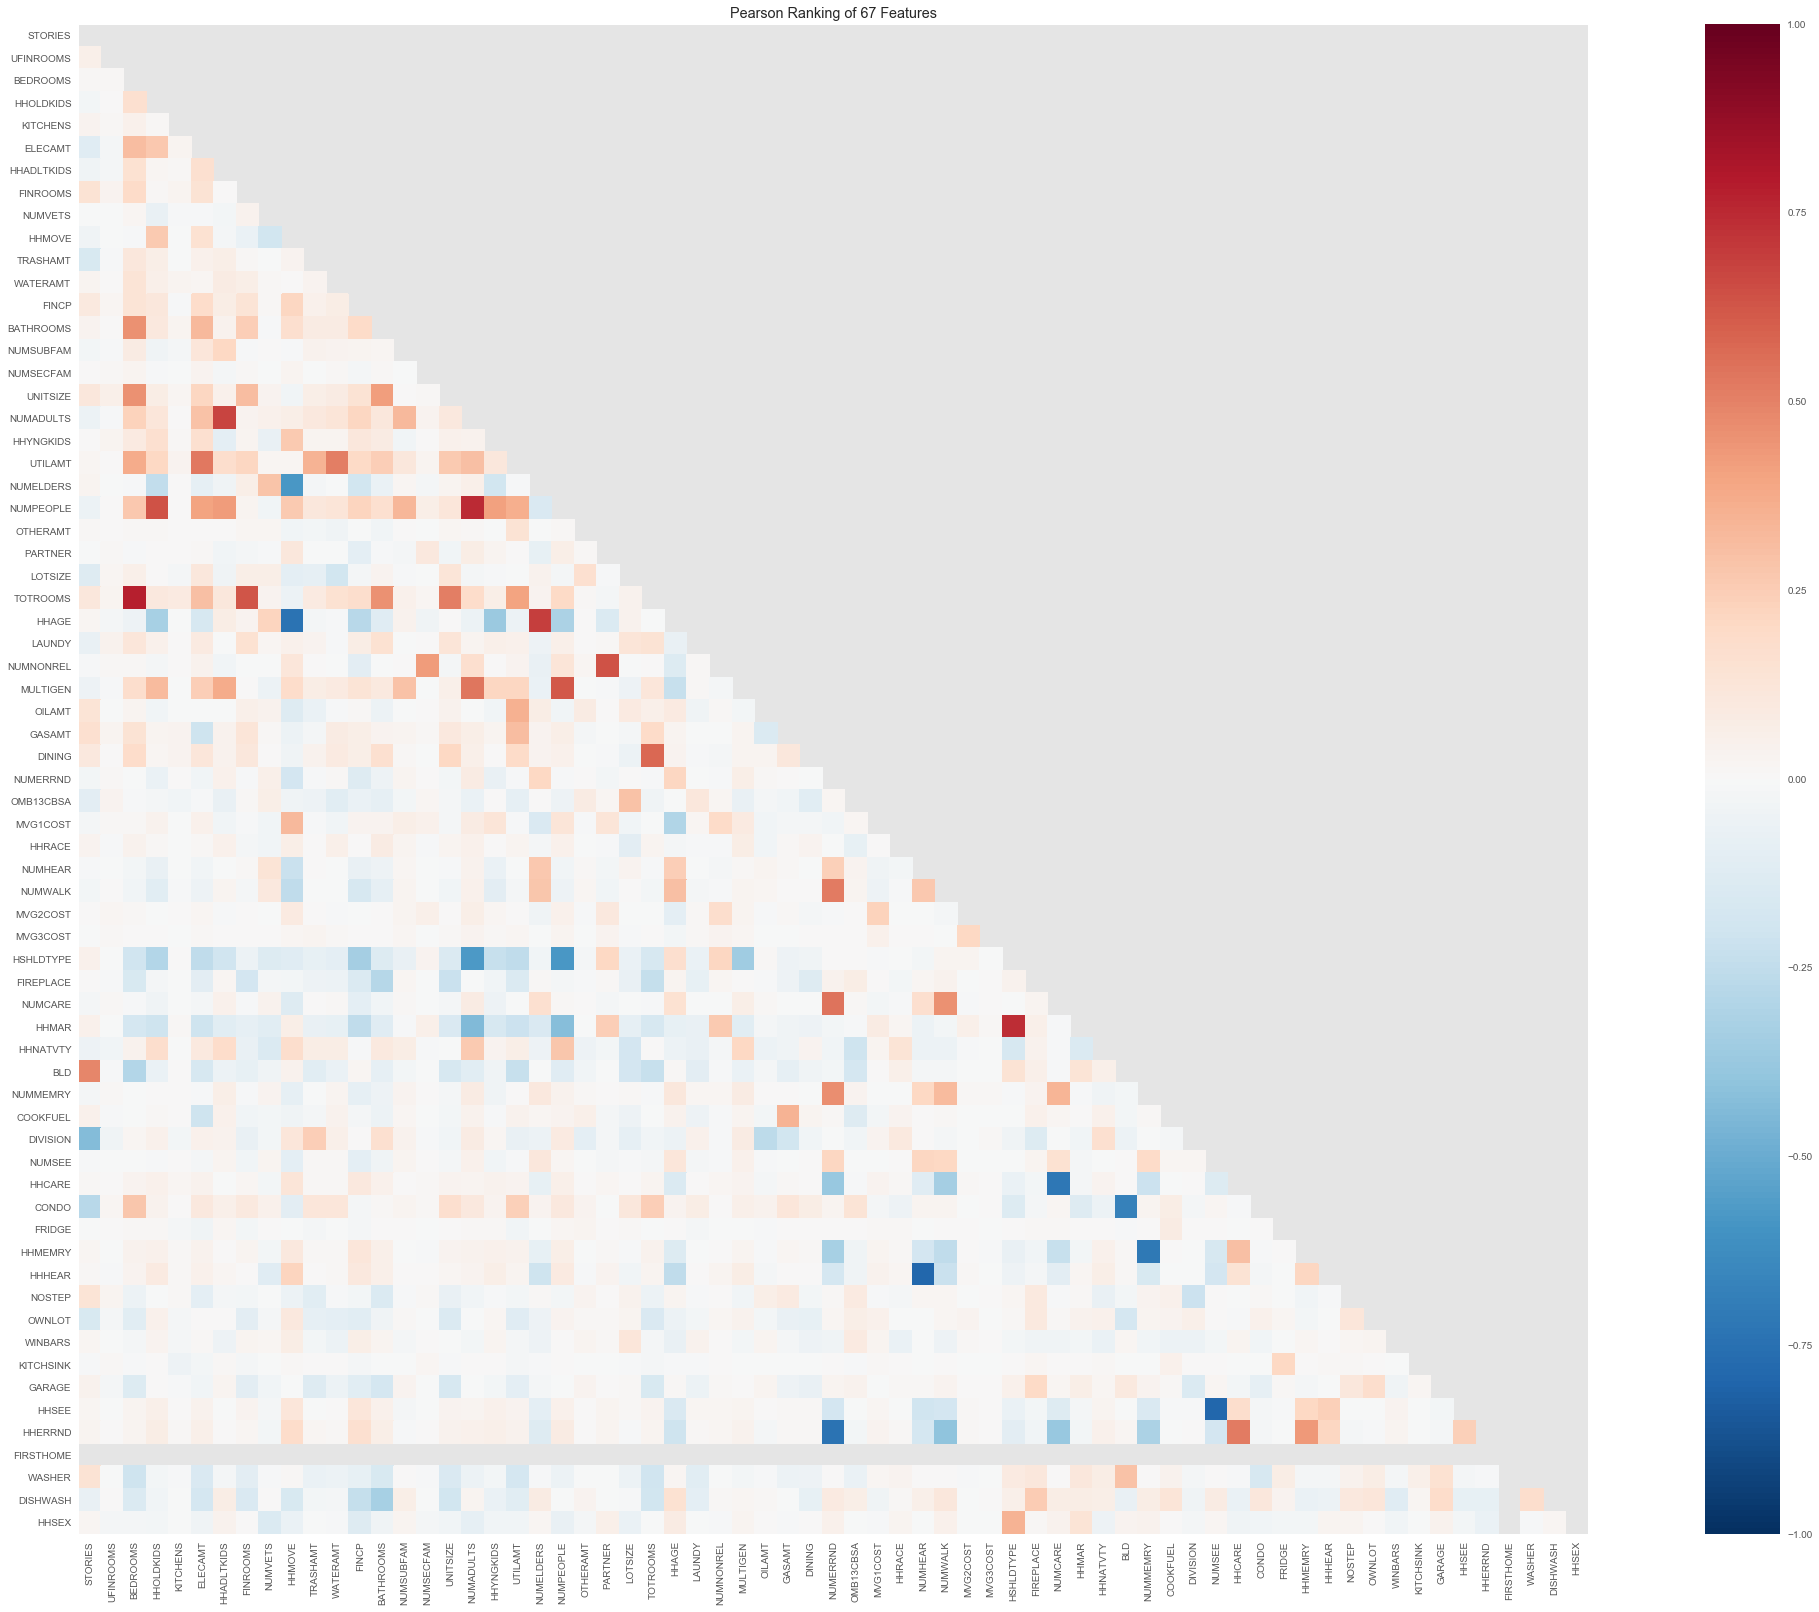

In [72]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(3000, 2000))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

## Feature Selection

In [73]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [83]:
features = X
labels   = y

In [84]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['ELECAMT', 'HHMOVE', 'HHAGE', 'HHNATVTY']


In [85]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['BEDROOMS', 'KITCHENS', 'FINROOMS', 'BATHROOMS', 'NUMELDERS', 'NUMNONREL', 'DINING', 'NUMWALK', 'MVG3COST', 'NUMCARE', 'NUMMEMRY', 'NUMSEE', 'HHCARE', 'CONDO', 'FRIDGE', 'OWNLOT', 'KITCHSINK', 'GARAGE', 'WASHER', 'DISHWASH', 'HHSEX']


In [86]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['ELECAMT', 'HHMOVE', 'HHAGE', 'HHNATVTY']


#### Based on the feature importance and SelectfromModel - top features are:
PERPOVLVL
HHAGE
HHMOVE
UTILAMT
HHNATVTY
BATHROOM
BEDROOM
OMB13CBSA
FINCP
UNITSIZE
LOTSIZE
TOTROOMS
BATHROOMS
NUMPEOPLE
STORIES
BEDROOMS
HHNATVTY
HSHLDTYPE
HHMAR

In [88]:
df.to_csv(os.path.join(path, 'AHS Household Class Features Selected.csv'))